# Capítulo 13: Modelos Generativos

## Autocodificadores

In [185]:
import os
import glob
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from keras import models, layers, optimizers
from keras.layers import Input, Dense
from keras.models import Model
from pathlib import Path
from PIL import Image

In [186]:
lista_flores = []
carpeta_imagenes = '../datasets/flowers/'
# Buscar imágenes con extensiones .jpg y .png (puedes agregar más extensiones si lo deseas)
extensiones = ['*.jpg', '*.png']
imagenes = []
tamaño_imagen = (64, 64)

In [187]:
for extension in extensiones:
    # Busca recursivamente en el directorio y subdirectorios
    lista_flores.extend(glob.glob(os.path.join(carpeta_imagenes, '**', extension), recursive=True))

print('Número de imágenes:', len(lista_flores))

Número de imágenes: 4317


In [188]:
def preprocesar(lista_imagenes):
    for imagen in lista_imagenes:
        try:        
            img = Image.open(imagen)        
            img = img.resize(tamaño_imagen)
            img_array = np.array(img)
            img_array = img_array.astype('float32') / 255.0
            imagenes.append(img_array)
        except Exception as e:
            print(f"Error al procesar la imagen {imagen}: {e}")
    return imagenes

In [189]:
imagenes_codificadas = preprocesar(lista_flores)

In [190]:
imagenes_codificadas = np.asarray(imagenes_codificadas)
imagenes_codificadas.shape

(4317, 64, 64, 3)

In [191]:
imagenes_codificadas = imagenes_codificadas.reshape((len(imagenes_codificadas), np.prod(imagenes_codificadas.shape[1:])))
imagenes_codificadas.shape

(4317, 12288)

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imagenes_codificadas, imagenes_codificadas, test_size=0.2, random_state=13)

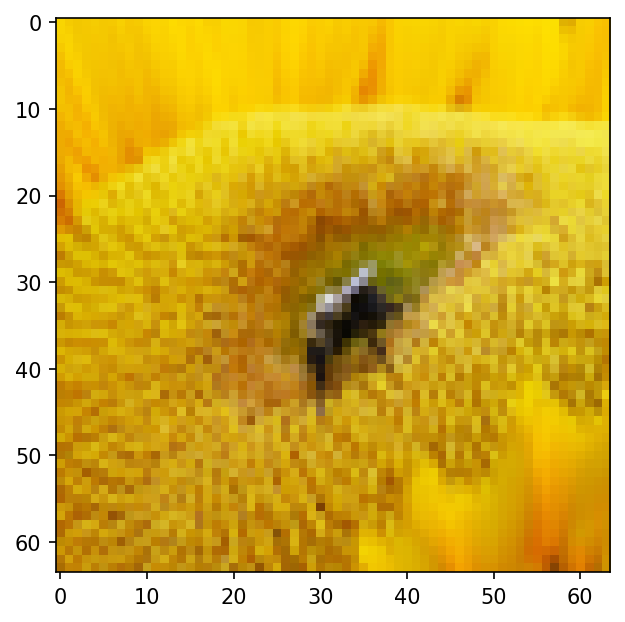

In [194]:
plt.imshow(X_train[6].reshape(64,64,3))

In [163]:
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

dim_ent=12288
dim_cod=128

In [164]:
capa_entrada = Input(shape=(dim_ent,))

#codificador
codificador = Dense(dim_cod * 4, activation='relu')(capa_entrada)
codificador = Dense(dim_cod * 2, activation='relu')(codificador)

# espacio latente
codificador = Dense(dim_cod, activation='relu')(codificador)

# decodificador
decodificador = Dense(dim_cod * 2, activation='relu')(codificador)
decodificador = Dense(dim_cod * 4, activation='relu')(decodificador)
decodificador = Dense(dim_ent, activation='sigmoid')(decodificador)

autocodificador = Model(capa_entrada, decodificador)
autocodificador.compile(optimizer='adam', loss='binary_crossentropy')
autocodificador.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 512)                 │       6,291,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 12288)               │       6,303,744 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,924,544 (49.30 MB)

 Trainable params: 12,924,544 (49.30 MB)

 Non-trainable params: 0 (0.00 B)

In [165]:
# Entrenar el modelo usando el X_train con forma (877, 64, 64, 3)
autocodificador.fit(X_train, X_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 0.6427 - val_loss: 0.6263
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - loss: 0.6141 - val_loss: 0.6126
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - loss: 0.6045 - val_loss: 0.6165
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.5964 - val_loss: 0.6011
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - loss: 0.5874 - val_loss: 0.6003
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.5799 - val_loss: 0.5774
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.5729 - val_loss: 0.5739
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.5684 - val_loss: 0.5709
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.5661 - val_loss: 0.5699
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.5636 - val_loss: 0.5668
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.5611 - val_loss: 0.5656
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


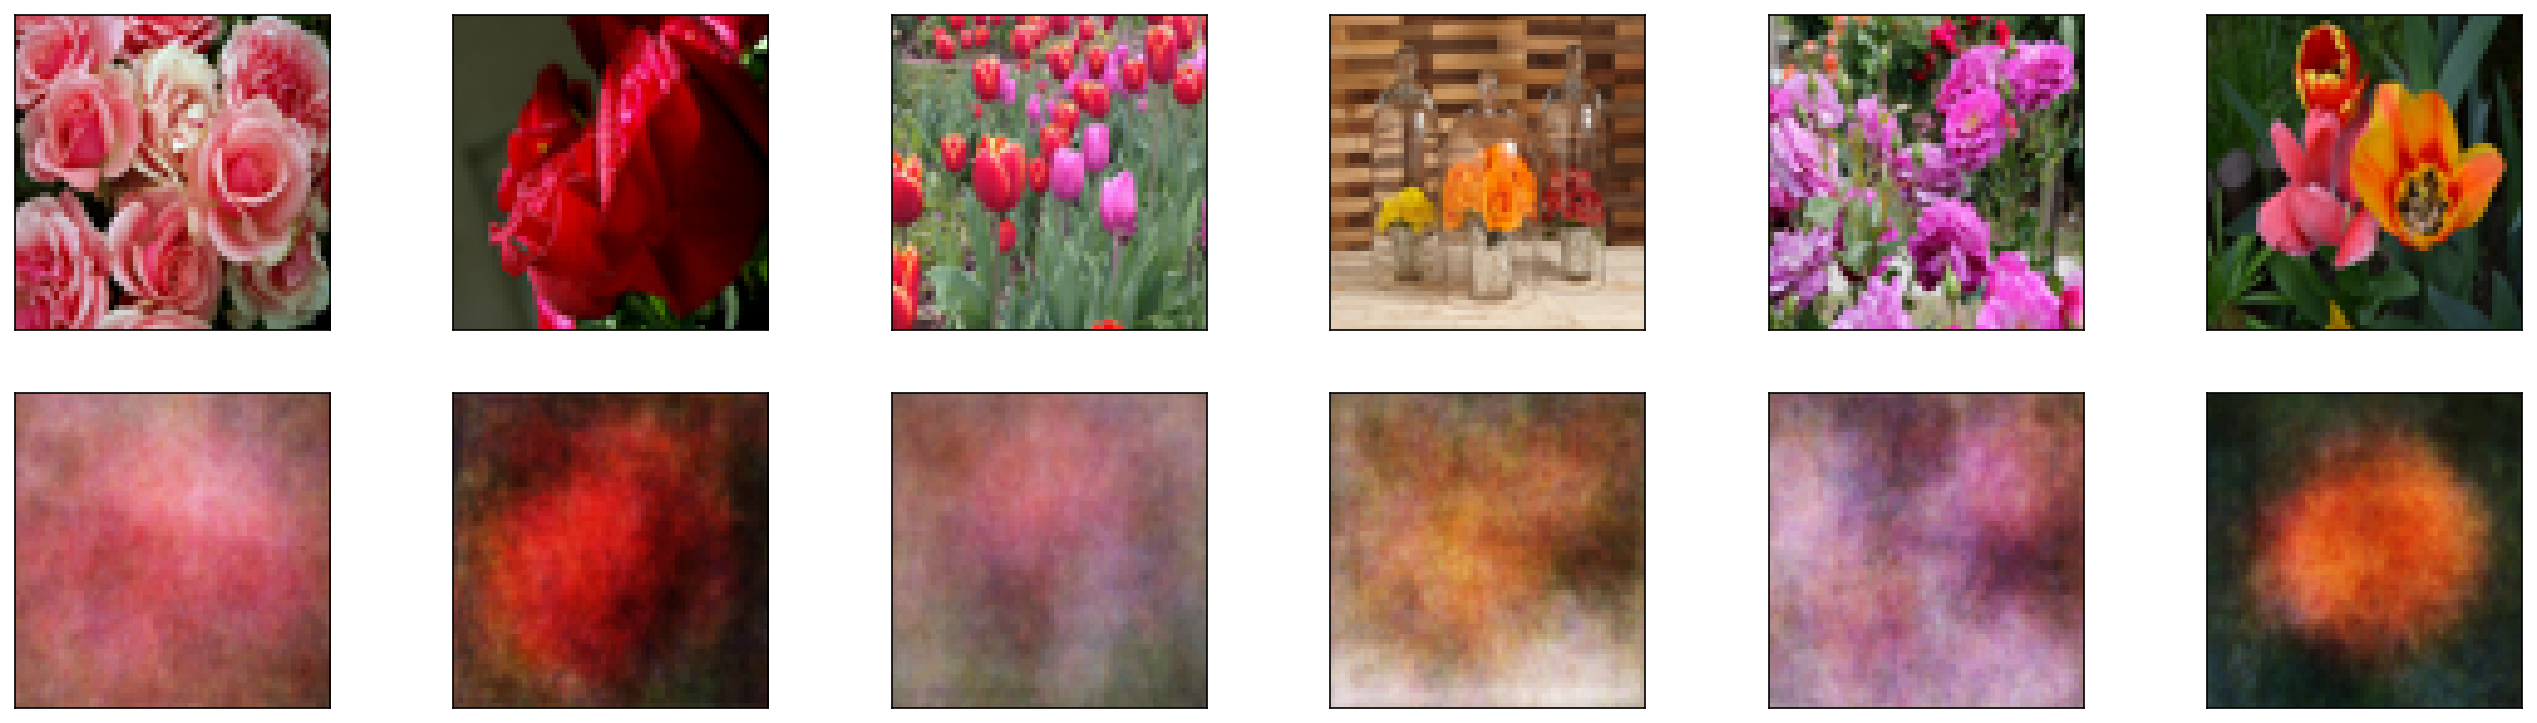

In [166]:
imgs_decodificadas = autocodificador.predict(X_test)

import matplotlib.pyplot as plt

n = 6  
plt.figure(figsize=(22, 6))
for i in range(n):
    # Mostrar imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(64, 64, 3))    #x_test
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # mostrar reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(imgs_decodificadas[i].reshape(64, 64, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Autocodificadores con Capas Convolucionales

In [196]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

capa_entrada = Input(shape=(64, 64, 3))

#Codificador
capa1 = Conv2D(32, (3, 3), activation='relu', padding='same')(capa_entrada)
capa2 = MaxPooling2D((2, 2), padding='same')(capa1)
capa3 = Conv2D(16, (3, 3), activation='relu', padding='same')(capa2)

# Capa latente
codificador = MaxPooling2D((2,2), padding='same')(capa3) 

# Decodificador
capa4 = Conv2D(16, (3, 3), activation='relu', padding='same')(codificador)
capa5 = UpSampling2D((2, 2))(capa4)
capa6 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(capa5)
capa7 = layers.UpSampling2D((2,2))(capa6)

decodificador = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(capa7)

autocodificador2 = Model(capa_entrada, decodificador)
autocodificador2.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)          │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 32, 32, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 16, 16, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_15 (UpSampling2D)      │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_16 (UpSampling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 64, 64, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,347 (52.14 KB)

 Trainable params: 13,347 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

In [178]:
imagenes_codificadas = preprocesar(lista_flores)

imagenes_codificadas = np.asarray(imagenes_codificadas)
imagenes_codificadas.shape

(12951, 64, 64, 3)

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imagenes_codificadas, imagenes_codificadas, test_size=0.2, random_state=13)

In [181]:
autocodificador2.compile(optimizer='adam', loss='mse')
autocodificador2.fit(X_train, X_train, epochs=50, batch_size=64,
                shuffle=True, verbose=1)

Epoch 1/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0106
Epoch 2/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0089
Epoch 3/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0084
Epoch 4/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0080
Epoch 5/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0077
Epoch 6/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0075
Epoch 7/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0073
Epoch 8/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0071
Epoch 9/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0069
Epoch 10/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0068
Epoch 11/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0067
Epoch 12/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0066
Epoch 13/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0065
Epoch 14/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0064
Epoch 15/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 9s

81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step 


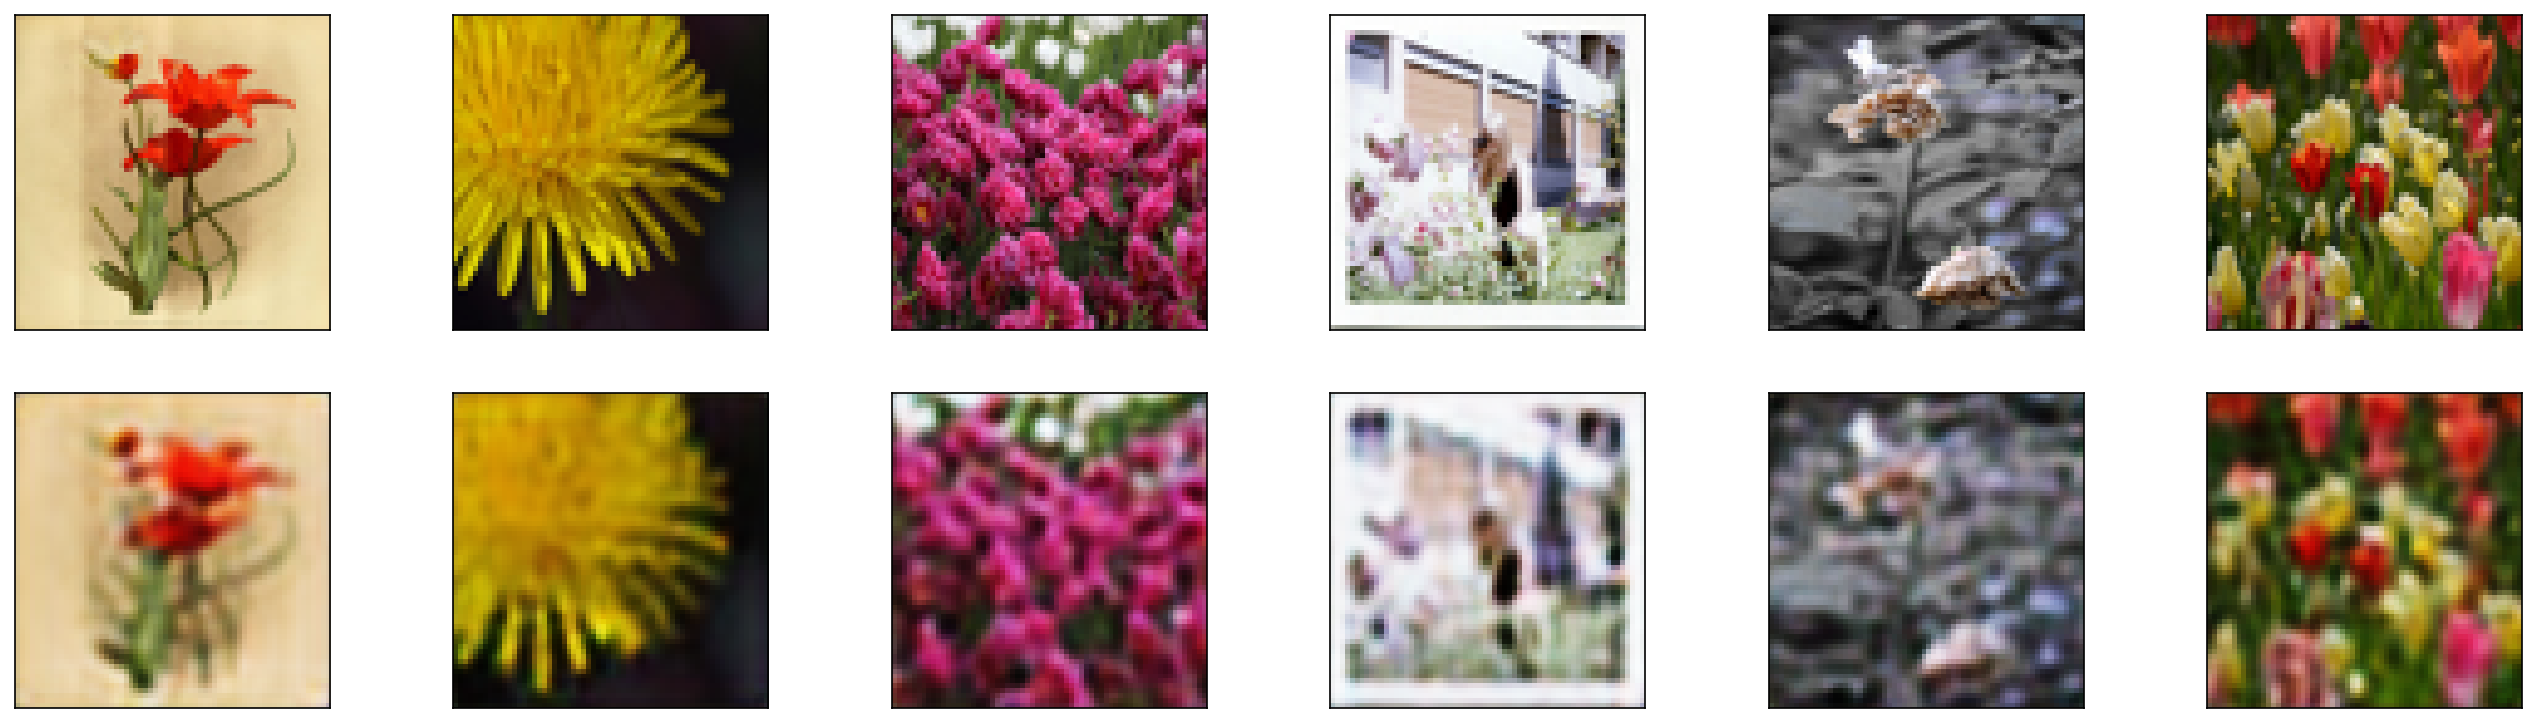

In [183]:
imgs_decod = autocodificador2.predict(X_test.reshape(-1, 64, 64, 3))

import matplotlib.pyplot as plt

n = 6  
plt.figure(figsize=(22, 6))
for i in range(n):
    # mostrar original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(64, 64, 3)) 
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # mostrar reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(imgs_decod[i].reshape(64, 64, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("my_plot.jpg", dpi=300) 
plt.show()

In [184]:
from PIL import Image
# Convertir a escala de grises
img = Image.open("my_plot.jpg").convert('L')
img.save('plot_grayscale.jpg', dpi=(300,300))

## Autocodificador Variacional

In [12]:
# Importar librerías
import numpy as np
import matplotlib.pylab as plt
from keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Lambda, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [5]:
# Cargar conjunto de datos MNIST
(X_train, _), (X_test, _) = mnist.load_data()

# Preprocesar datos
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = X_train.reshape((-1, 28, 28))
X_test = X_test.reshape((-1, 28, 28))

In [6]:
# Definir arquitectura del autocodificador variacional
entrada_img = Input(shape=(28, 28))
x = Reshape((784,))(entrada_img)
x = Dense(512, activation='relu')(x)
z_mean = Dense(2)(x)
z_log_var = Dense(2)(x)

# Capa de muestreo
def muestreo(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(tf.shape(z_mean), 0, 1)
    return z_mean + tf.exp(z_log_var / 2) * epsilon

z = Lambda(muestreo)([z_mean, z_log_var])

decodificador = Dense(512, activation='relu')
decodificador_salida = Dense(784, activation='sigmoid')
decodificador_oc = decodificador(z)
decodificador_salida_oc = Reshape((28, 28))(decodificador_salida(decodificador_oc))

In [7]:
import tensorflow as tf

def perdida_vae(y, y_pred, z_mean, z_log_var):
    # Reconstrucción
    perdida_reconstruccion = tf.reduce_mean(tf.square(y - y_pred))
    # Pérdida de KL
    perdida_kl = - 0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
    # Pérdida total
    perdida_total = perdida_reconstruccion + perdida_kl
    return perdida_total

In [8]:
class CapaPerdidaVAE(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CapaPerdidaVAE, self).__init__(**kwargs)

    def call(self, entradas):
        y, y_pred, z_mean, z_log_var = entradas
        perdida = perdida_vae(y, y_pred, z_mean, z_log_var)
        self.add_loss(perdida)
        return tf.zeros(tf.shape(y)[0])

In [9]:
# Modelo
vae = tf.keras.Model(entrada_img, decodificador_salida_oc)
# Capa de pérdida
capa_perdida_vae = CapaPerdidaVAE()([entrada_img, decodificador_salida_oc, z_mean, z_log_var])
# Compilar modelo
vae.compile(optimizer='adam', loss='binary_crossentropy')

In [10]:
# Entrenar modelo
vae.fit(X_train, X_train, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2424
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2086
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2013
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1972
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1941
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1918
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1901
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1887
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1874
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1864
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1855
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1846
Epoch 13/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1838
Epoch 14/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1832
Epoch 15/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


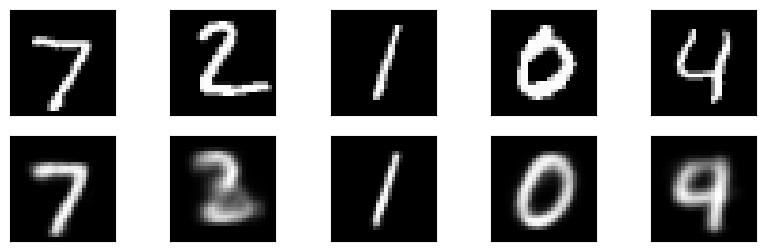

In [13]:
# Visualizar resultados
n = 5
plt.figure(figsize=(10, 3))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, n + i + 1)
    reconstruction = vae.predict(X_test[i].reshape(1, 28, 28))
    plt.imshow(reconstruction.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("my_plot.jpg", dpi=300)
plt.show()

## Redes Antagónicas generativas (GAN)

In [55]:
import tensorflow as tf
import tensorflow.keras.layers
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout, LeakyReLU, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Cargar y preprocesar MNIST
mnist_data = mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist_data
X_train = (X_train.astype(np.float32) - 127.5) / 127.5  # Escalar a [-1, 1]
X_train = np.expand_dims(X_train, axis=-1)  # Añadir canal

X_test = (X_test.astype(np.float32) - 127.5) / 127.5  # Escalar a [-1, 1]
X_test = np.expand_dims(X_test, axis=-1)  # Añadir canal

In [56]:
def obtener_generador():
    modelo = tf.keras.Sequential([
        Input(shape=(100,)),
        Dense(256, activation='relu'),       
        Dense(512, activation=LeakyReLU(alpha=0.01)),       
        Dense(1024, activation=LeakyReLU(alpha=0.01)),       
        Dense(28 * 28 * 1, activation='tanh'),
        Reshape((28, 28, 1))
    ])
    return modelo
    
# creamos el generador    
generador = obtener_generador()
print(generador.summary())

C:\Users\carlo\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 256)                 │          25,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 784)                 │         803,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_8 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,486,352 (5.67 MB)

 Trainable params: 1,486,352 (5.67 MB)

 Non-trainable params: 0 (0.00 B)

None


In [57]:
def obtener_discriminador():
    modelo = tf.keras.Sequential([
        Input(shape=(28, 28, 1)),
        Flatten(),
        Dense(512, activation=LeakyReLU(alpha=0.01)),
        Dense(256, activation=LeakyReLU(alpha=0.01)),
        Dense(1, activation='sigmoid')
    ])
    return modelo

# creamos el discriminador
discriminador = obtener_discriminador()
print(discriminador.summary())

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 533,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None


In [58]:
# Compilar el discriminador
discriminador.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Crear la GAN
entrada_gan = Input(shape=(100,))
imagen_gen = generador(entrada_gan)
salida_gan = discriminador(imagen_gen)

gan = tf.keras.Model(entrada_gan, salida_gan)
gan.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='binary_crossentropy')
print(gan.summary())

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_11 (Sequential)           │ (None, 28, 28, 1)           │       1,486,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_12 (Sequential)           │ (None, 1)                   │         533,505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,019,857 (7.71 MB)

 Trainable params: 2,019,857 (7.71 MB)

 Non-trainable params: 0 (0.00 B)

None


In [59]:
epocas = 50
tam_lote = 128
intervalo = 10
suavizado = 0.1
tam_eval = 16

# Etiquetas para imágenes reales y falsas
etiquetas_reales = np.ones((tam_lote, 1))
etiquetas_falsas = np.zeros((tam_lote, 1))

etiquetas_eval_reales = np.ones((tam_eval, 1))
etiquetas_eval_falsas = np.zeros((tam_eval, 1))

for epoca in range(epocas):
    for i in range(len(X_train)//tam_lote):
      # Entrenamos el discriminador
      idx = np.random.randint(0, X_train.shape[0], tam_lote)
      imagenes_reales = X_train[idx]

      ruido = np.random.normal(0, 1, (tam_lote, 100))
      imagenes_generadas = generador.predict_on_batch(ruido)

      # Entrenamos el generador
      discriminador.trainable = True
      perdida_discrimador_real = discriminador.train_on_batch(imagenes_reales, etiquetas_reales * (1 - suavizado))
      perdida_discriminador_falsa = discriminador.train_on_batch(imagenes_generadas, etiquetas_falsas)

      discriminador.trainable = False
      ruido = np.random.normal(0, 1, (tam_lote, 100))
      perdida_gan = gan.train_on_batch(ruido, etiquetas_reales)

    # evaluación
    X_eval_real = X_test[np.random.choice(len(X_test), tam_eval, replace=False)]
    ruido = np.random.normal(0, 1, (tam_eval, 100))
    X_eval_falsa = generador.predict_on_batch(ruido)

    perdida_d  = discriminador.test_on_batch(X_eval_real, etiquetas_eval_reales)
    perdida_d += discriminador.test_on_batch(X_eval_falsa, etiquetas_eval_falsas)
    perdida_g  = gan.test_on_batch(ruido, etiquetas_eval_falsas) 
       
    if epoca % intervalo == 0:
        print(f"{epoca} [Pérdida D: {perdida_d[0]:0.3f} "
        f"| Exactitud del D: {100 * perdida_d[1]:0.3f}] "
        f"[Pérdida del G: {perdida_g:0.3f}]"
        )

0 [Pérdida D: 0.216 | Exactitud del D: 49.079] [Pérdida del G: 5.742]
10 [Pérdida D: 0.189 | Exactitud del D: 49.719] [Pérdida del G: 6.273]
20 [Pérdida D: 0.197 | Exactitud del D: 49.724] [Pérdida del G: 6.147]
30 [Pérdida D: 0.226 | Exactitud del D: 49.545] [Pérdida del G: 5.389]
40 [Pérdida D: 0.253 | Exactitud del D: 49.339] [Pérdida del G: 4.782]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


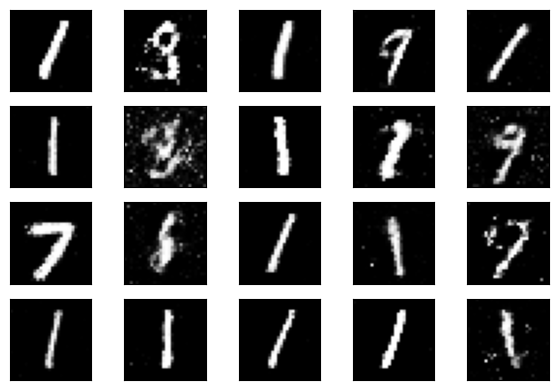

In [60]:
entrada = np.random.normal(0, 1, (tam_lote, 100))
digitos_generados = generador.predict(entrada)

plt.figure(figsize=(6, 4))
for i in range(20):
    img = digitos_generados[i]
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig("my_plot.jpg", dpi=300)
plt.show()